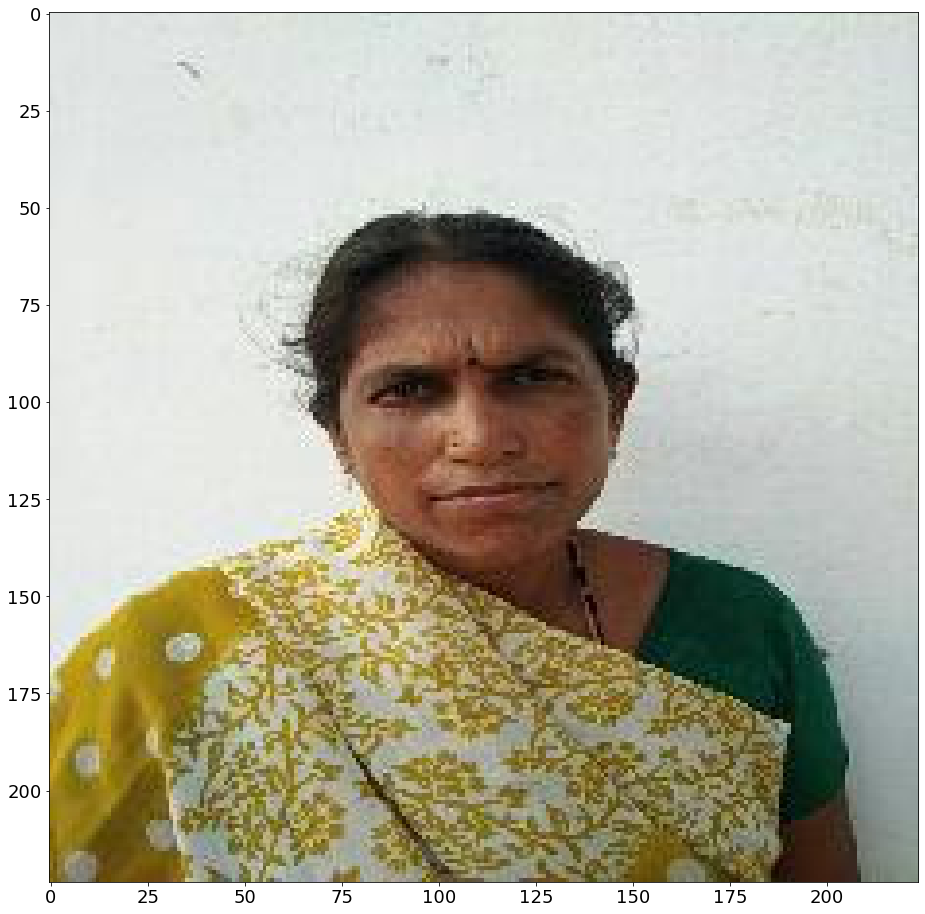

In [3]:
# Using the PyWavelets module, available at 
# https://pywavelets.readthedocs.io/en/latest/install.html

from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [16, 16]
plt.rcParams.update({'font.size': 18})

# A = imread(os.path.join('..','DATA','dog.jpg'))
A = imread('test.jpg')
B = np.mean(A,-1); # Convert RGB to grayscale
plt.imshow(A)

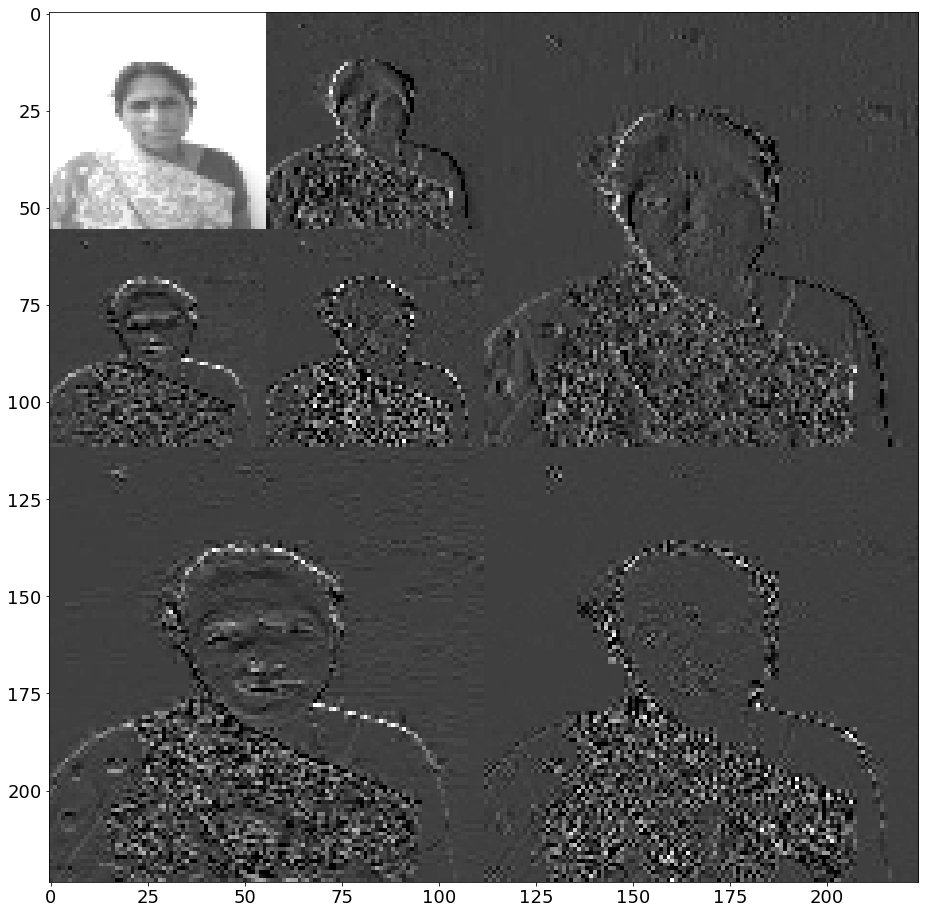

In [4]:
## Wavelet decomposition (2 level)
n = 2
w = 'haar'
coeffs = pywt.wavedec2(B,wavelet=w,level=n)

# normalize each coefficient array
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

arr, coeff_slices = pywt.coeffs_to_array(coeffs)



plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.show()

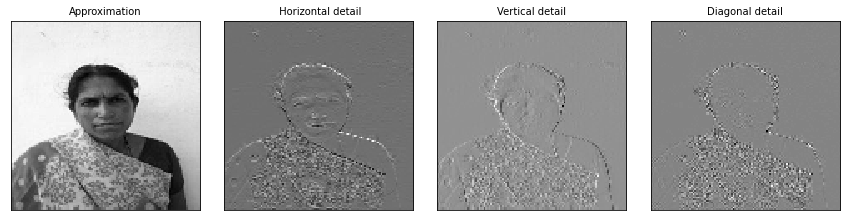

(224, 224, 3)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import pywt.data


# Load image
original = cv2.imread("test.jpg")
b = np.mean(original, -1)

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(b, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()
print(original.shape)

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pywt
import pywt.data
import skimage.measure


# Load image
original = cv2.imread("test.jpg")
b = np.mean(original, -1)

# Wavelet transform of image, and plot approximation and details

coeffs2 = pywt.dwt2(b, 'db1')
LL, (LH, HL, HH) = coeffs2
# fig = plt.figure(figsize=(12, 12))

# ax = fig.add_subplot(1, 4, 1 + 1)
# ax.imshow(LH, interpolation="nearest", cmap=plt.cm.gray)
# ax.set_title(titles[1], fontsize=10)
# ax.set_xticks([])
# ax.set_yticks([])
print(LH.shape)
op=skimage.measure.block_reduce(LH, (7,7), np.linalg.norm)
print(op)


# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()
# print(original.shape)

(112, 112)
[[  2.           8.63133825  72.44480658  15.49641536   6.52771868
   15.05822035  23.41177292  41.14608122  14.79864859   9.61769203
   22.41093483  23.96872963  18.44134847  20.27039439  16.66499992
   18.30300522]
 [  5.91607978   4.63680925  56.61173808   9.54812372   9.00308589
   17.49444356  14.02378931  24.35615368  25.09703391  12.45882106
   16.11676146  18.06239187   9.34077085  22.42766149  20.8306665
   18.53075522]
 [  4.30116263   4.47213595   6.61857655  16.58061117   5.97913037
   10.0871205   14.35270009   8.51469318   9.1241438    5.54526825
   15.14925741  13.58307771  19.42935923  20.87928266  12.76823315
   16.77796174]
 [  2.34520788   5.7662813    3.35410197   4.84767986  10.3373648
   93.25770746 228.60191017 136.74520101 251.97062219  48.53921668
   11.54339638  21.62239066  29.38631579  30.79908007  38.44115272
   26.63539833]
 [  0.           0.           5.54777233  15.1208098   62.14499175
  171.65210294  57.80138407  57.91660671  65.15920673 23